# 1. Data Loading and import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
from sklearn.decomposition import PCA
import sklearn.metrics as skm
import xgboost
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import f1_score, roc_auc_score,log_loss, confusion_matrix, precision_score, recall_score, accuracy_score 
%config InlineBackend.figure_format = 'svg' 

In [2]:
dataframe = pd.read_csv('credit_train.csv')

In [3]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# 2. Exploratory Data Analysis

In [5]:
print("Number of Rows is ",dataframe.shape[0] ,"\nNumber of colmun is ",dataframe.shape[1])

Number of Rows is  100514 
Number of colmun is  19


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
#Checking if there is duplicate
print(dataframe.duplicated().sum())

10728


In [8]:
dataframe.isna().sum() 

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

# 3. Data Preprocssing 

## - Data Cleaning

In [9]:
dataframe.tail(514)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataframe.drop(dataframe.tail(514).index, inplace=True)

In [11]:
dataframe.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)


### a. Missing value

In [12]:
dataframe.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [13]:
for i in dataframe['Tax Liens'][dataframe['Tax Liens'].isnull() == True].index:
    dataframe.drop(labels=i, inplace=True)


In [14]:
for i in dataframe['Maximum Open Credit'][dataframe['Maximum Open Credit'].isnull() == True].index:
    dataframe.drop(labels=i, inplace=True)

In [15]:
for i in dataframe['Bankruptcies'][dataframe['Bankruptcies'].isnull() == True].index:
    dataframe.drop(labels=i, inplace=True)

In [16]:
dataframe.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [17]:
dataframe.isna().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19111
Annual Income                19111
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [18]:
dataframe['Years in current job']=dataframe['Years in current job'].str.extract(r"(\d+)")
dataframe['Years in current job'] = dataframe['Years in current job'].astype(float)
expmean = (dataframe['Years in current job'].mean())

In [19]:
dataframe['Years in current job'].fillna(expmean, inplace=True)

In [20]:
Score_mean = (dataframe['Credit Score'].mean())
dataframe['Credit Score'].fillna(Score_mean, inplace=True)

In [21]:
Annual_mean = (dataframe['Annual Income'].mean())
dataframe['Annual Income'].fillna(Annual_mean, inplace=True)

In [22]:
dataframe.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

### B. Duplicated rows

In [23]:
print(dataframe.duplicated().sum())

10201


In [24]:
dataframe.drop_duplicates(inplace=True)

In [25]:
dataframe['Purpose']=dataframe['Purpose'].replace(to_replace ="other",
                 value ="Other")

In [26]:
print("Number of Rows is ",dataframe.shape[0] ,"\nNumber of colmun is ",dataframe.shape[1])


Number of Rows is  89593 
Number of colmun is  16


## - Data conversion to dummy variables  

In [27]:
dataframe['Loan Status'] = dataframe['Loan Status'].map({'Charged Off':0 ,'Fully Paid':1})

# 4. Data visualization 

<AxesSubplot:>

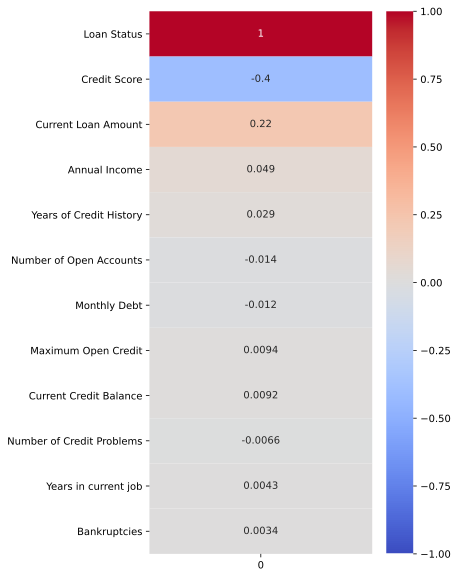

In [28]:
correlations =dataframe.corrwith(dataframe['Loan Status']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)

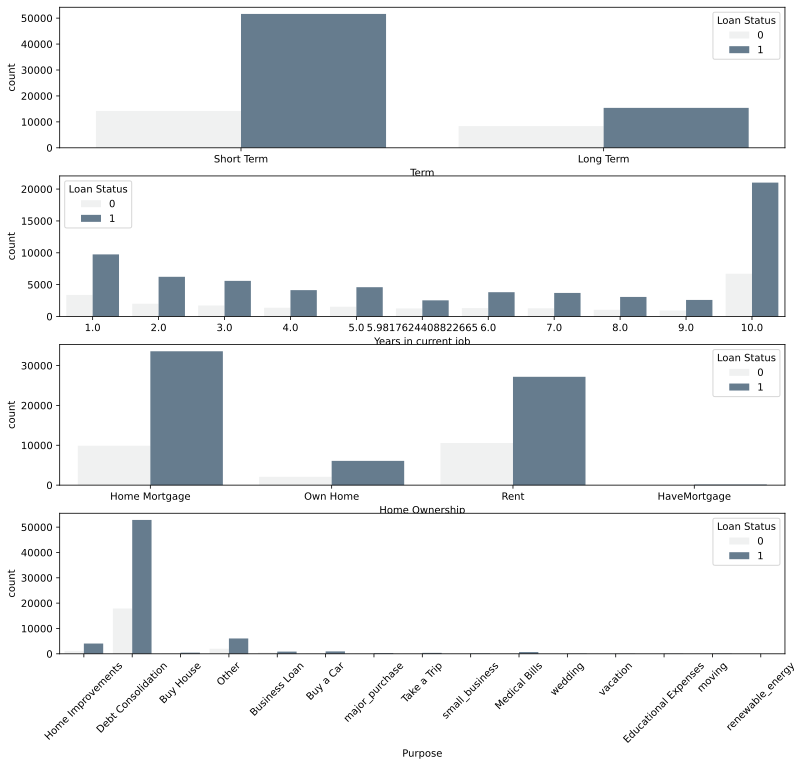

In [29]:
Category = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
plt.figure(figsize=(13 ,15))
for i in range(1,5):
  plt.subplot(5,1,i)
  sns.countplot(x=Category[i], data =dataframe, hue='Loan Status',color='#5F7D95')
plt.xticks(rotation=45)
plt.show()


# 5. Splitting the dataset into the Training set and Test set


In [33]:
dataframe=pd.get_dummies(dataframe,drop_first=True)
dataframe

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412.0,709.000000,1.167493e+06,8.000000,5214.74,17.2,6.0,1.0,228190.0,...,1,0,0,0,0,0,0,0,0,0
1,1,262328.0,1076.275101,1.378339e+06,10.000000,33295.98,21.1,35.0,0.0,229976.0,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999.0,741.000000,2.231892e+06,8.000000,29200.53,14.9,18.0,1.0,297996.0,...,0,0,0,0,0,0,0,0,0,0
3,1,347666.0,721.000000,8.069490e+05,3.000000,8741.90,12.0,9.0,0.0,256329.0,...,0,0,0,0,0,0,0,0,0,0
4,1,176220.0,1076.275101,1.378339e+06,5.000000,20639.70,6.1,15.0,0.0,253460.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,210584.0,719.000000,7.833890e+05,1.000000,3727.61,17.4,6.0,0.0,456.0,...,0,0,1,0,0,0,0,0,0,0
99996,1,99999999.0,732.000000,1.289416e+06,1.000000,13109.05,9.4,22.0,0.0,153045.0,...,0,0,0,0,0,0,0,0,0,0
99997,1,103136.0,742.000000,1.150545e+06,6.000000,7315.57,18.8,12.0,1.0,109554.0,...,0,0,0,0,0,0,0,0,0,0
99998,1,530332.0,746.000000,1.717524e+06,9.000000,9890.07,15.0,8.0,0.0,404225.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print("Number of Rows is ",dataframe.shape[0] ,"\nNumber of colmun is ",dataframe.shape[1])

Number of Rows is  89593 
Number of colmun is  31


In [35]:
X=dataframe.drop('Loan Status',axis=1)
y=dataframe['Loan Status']


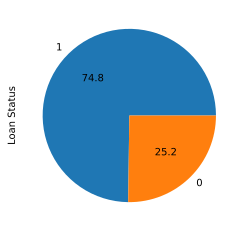

In [50]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.1f');

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, 
    test_size=.2, 
    random_state=0
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71674, 30)
(17919, 30)
(71674,)
(17919,)


In [38]:
y_train

45554    1
45610    0
25061    1
82529    1
27769    1
        ..
21773    1
48316    1
44703    1
45732    1
74072    1
Name: Loan Status, Length: 71674, dtype: int64

# 6. Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [41]:
X_test_scaler

array([[-3.67739660e-01, -2.67216095e-01,  4.81230913e+00, ...,
        -5.23650882e-02, -2.96606323e-02, -3.46600441e-02],
       [-3.76910753e-01,  3.93983257e+00, -2.10994917e-01, ...,
        -5.23650882e-02, -2.96606323e-02, -3.46600441e-02],
       [-3.83736260e-01, -2.85872630e-01, -3.28816427e-01, ...,
        -5.23650882e-02, -2.96606323e-02, -3.46600441e-02],
       ...,
       [-3.67496625e-01, -3.09417685e-02,  3.34048009e-03, ...,
        -5.23650882e-02, -2.96606323e-02, -3.46600441e-02],
       [-3.87902290e-01, -3.09417685e-02,  3.34048009e-03, ...,
        -5.23650882e-02, -2.96606323e-02, -3.46600441e-02],
       [-3.83181981e-01, -2.98071133e-01, -2.84671417e-01, ...,
        -5.23650882e-02, -2.96606323e-02, -3.46600441e-02]])

# Under sampling 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
#rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_scaler, y_train = rus.fit_resample(X_train_scaler,y_train)

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
y_train.value_counts()

# Modeling 

### with undersampling

In [ ]:
xgboost_classifer= XGBClassifier(random_state=42 )
xgboost_classifer.fit(X_train_scaler,y_train)

In [ ]:
k = xgboost_classifer.score(X_train_scaler, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

In [ ]:
the Accuracy on the Training set come out to be : 0.7924366017424116

In [ ]:
y_pred=xgboost_classifer.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
[[3038 1528]
 [4270 9083]]

In [ ]:
pl=plot_confusion_matrix(xgboost_classifer,X_test_scaler,y_test,cmap=plt.cm.Reds)
plt.show(pl)

In [ ]:
print(skm.classification_report(y_test,y_pred))

In [ ]:
precision    recall  f1-score   support

           0       0.42      0.67      0.51      4566
           1       0.86      0.68      0.76     13353

    accuracy                           0.68     17919
   macro avg       0.64      0.67      0.63     17919
weighted avg       0.74      0.68      0.70     17919

In [ ]:
print("Precision: {:6.4f} %   of the tests positive predictions are correct,\nRecall: {:6.4f} %,\nF1 score: {:6.4f} %".format(precision_score(y_test, y_pred)*100, 
                                                     recall_score(y_test, y_pred)*100, f1_score(y_test, y_pred)*100))

In [ ]:
Precision: 85.5998 %   of the tests positive predictions are correct,
Recall: 68.0222 %

###  XGBClassifier With balanced 

In [ ]:
XGBClassifier_wb= XGBClassifier(class_weight='balanced',random_state=42 )
XGBClassifier_wb.fit(X_train_scaler,y_train)

In [ ]:
k = XGBClassifier_wb.score(X_train_scaler, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.8242319390573988

In [ ]:
pl=plot_confusion_matrix(XGBClassifier_wb,X_test_scaler,y_test,cmap=plt.cm.Blues)
plt.show(pl)

In [ ]:
y_pred=XGBClassifier_wb.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)
print(cm)


In [ ]:
[[ 1191  3375]
 [  251 13102]]

In [ ]:

print(skm.classification_report(y_test,y_pred))

In [ ]:
   precision    recall  f1-score   support

           0       0.83      0.26      0.40      4566
           1       0.80      0.98      0.88     13353

    accuracy                           0.80     17919
   macro avg       0.81      0.62      0.64     17919
weighted avg       0.80      0.80      0.76     17919


In [ ]:
print("Precision: {:6.4f} %   of the tests positive predictions are correct,\nRecall: {:6.4f} %,\nF1 score: {:6.4f} %".format(precision_score(y_test, y_pred)*100, 
                                                     recall_score(y_test, y_pred)*100, f1_score(y_test, y_pred)*100))

In [ ]:
Precision: 79.5169 %   of the tests positive predictions are correct,
Recall: 98.1203 %

###  Randon Forset With balanced 

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',random_state=0)
rf.fit(X_train_scaler,y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [43]:
k = rf.score(X_train_scaler, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 1.0


the Accuracy on the Training set come out to be : 1.0

In [44]:
y_pred=rf.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1085  3481]
 [  145 13208]]


[[ 1068  3498]
 [  128 13225]]

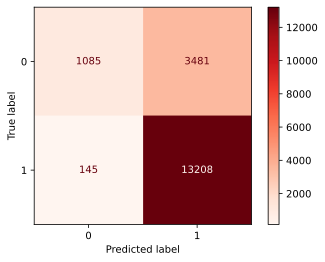

In [45]:
pl=plot_confusion_matrix(rf,X_test_scaler,y_test,cmap=plt.cm.Reds)
plt.show(pl)

In [46]:
print(skm.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.24      0.37      4566
           1       0.79      0.99      0.88     13353

    accuracy                           0.80     17919
   macro avg       0.84      0.61      0.63     17919
weighted avg       0.81      0.80      0.75     17919



precision    recall  f1-score   support

           0       0.89      0.23      0.37      4566
           1       0.79      0.99      0.88     13353

    accuracy                           0.80     17919
   macro avg       0.84      0.61      0.63     17919
weighted avg       0.82      0.80      0.75     17919

In [47]:
print("Precision: {:6.4f} %   of the tests positive predictions are correct,\nRecall: {:6.4f} %,\nF1 score: {:6.4f} %".format(precision_score(y_test, y_pred)*100, 
                                                     recall_score(y_test, y_pred)*100, f1_score(y_test, y_pred)*100))

Precision: 79.1419 %   of the tests positive predictions are correct,
Recall: 98.9141 %,
F1 score: 87.9302 %


In [ ]:
Precision: 79.0827 %   of the tests positive predictions are correct,
Recall: 99.0414 %

###  LogisticRegression With balanced 

In [ ]:
from sklearn.linear_model import LogisticRegression
Lr_classifier=LogisticRegression(class_weight='balanced' ,random_state = 42) 
Lr_classifier.fit(X_train_scaler,y_train)

In [ ]:
k = Lr_classifier.score(X_train_scaler, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

In [ ]:
y_pred=Lr_classifier.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
pl=plot_confusion_matrix(Lr_classifier,X_test_scaler,y_test,cmap=plt.cm.Blues)
plt.show(pl)

In [ ]:
print("Precision: {:6.4f} %   of the tests positive predictions are correct,\nRecall: {:6.4f} %,\nF1 score: {:6.4f} %".format(precision_score(y_test, y_pred)*100, 
                                                     recall_score(y_test, y_pred)*100, f1_score(y_test, y_pred)*100))